<a href="https://colab.research.google.com/github/MTahaRezaei/ex_1/blob/main/GT_EX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

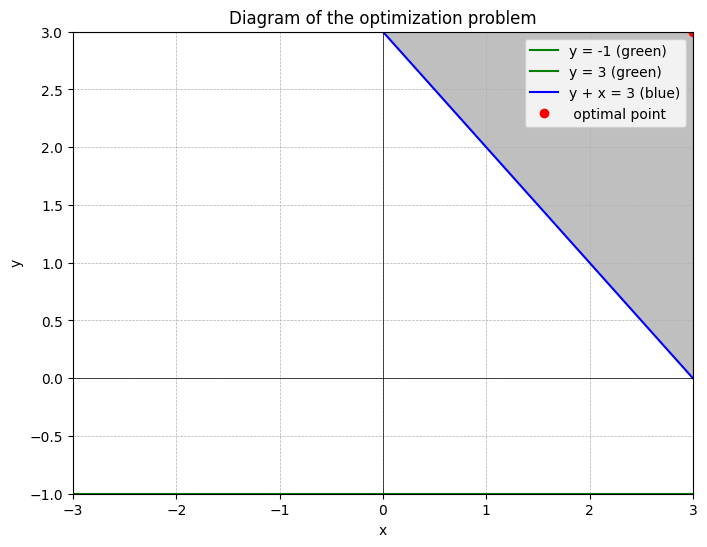

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# تعریف محدودیت‌ها
x = np.linspace(-3, 3, 400)
y_max = 3
y_min = -1

# معادله خط y + x = 3
y_line = 3 - x

# نمایش خطوط محدودیت
plt.figure(figsize=(8, 6))
plt.plot(x, [y_min]*len(x), 'g-', label='y = -1 (green)')
plt.plot(x, [y_max]*len(x), 'g-', label='y = 3 (green)')
plt.plot(x, y_line, 'b-', label='y + x = 3 (blue)')

# پر کردن ناحیه قابل قبول
plt.fill_between(x, y_line, y_max, where=(y_line <= y_max), color='grey', alpha=0.5, interpolate=True)

# نمایش نقطه بهینه
optimal_x, optimal_y = 3, 3
plt.plot(optimal_x, optimal_y, 'ro', label=' optimal point')

# تنظیمات نمودار
plt.xlim(-3, 3)
plt.ylim(y_min, y_max)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('Diagram of the optimization problem')
plt.show()


Qustion 2

<ipython-input-14-50fb446f947f>:18: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, eq1, levels=[0], colors='blue', label='y + 3x <= 6')
<ipython-input-14-50fb446f947f>:19: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, eq2, levels=[0], colors='green', label='y - 5x <= 6')
<ipython-input-14-50fb446f947f>:20: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, eq3, levels=[0], colors='red', label='0.625x - y <= 75')


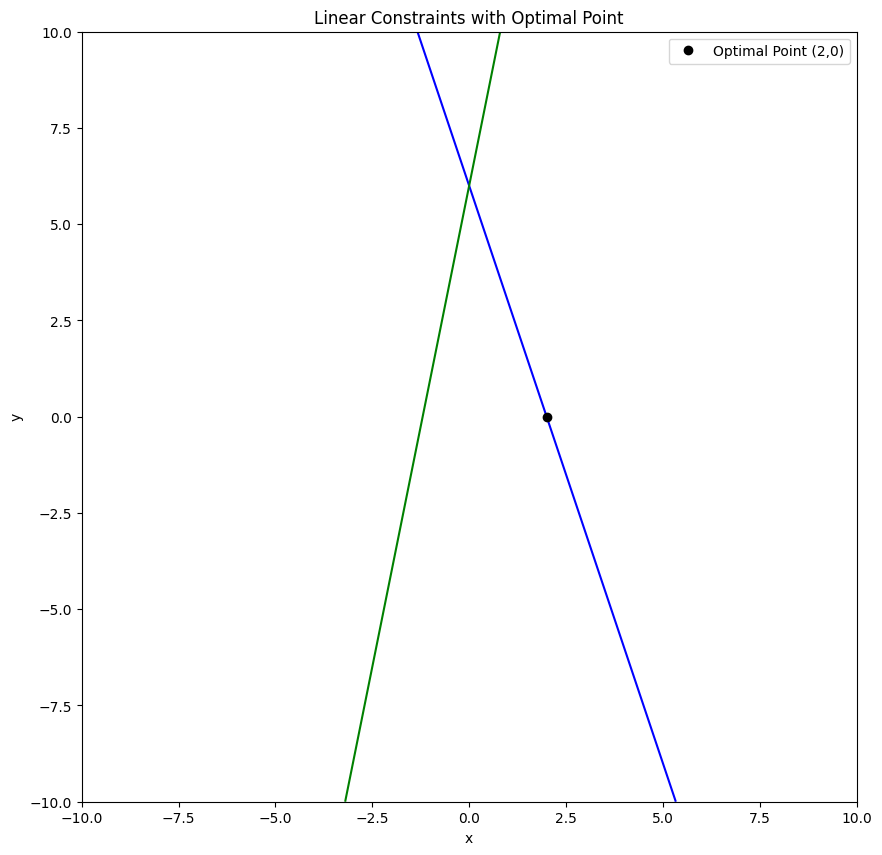

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تعریف محدوده‌های x و y
x_range = np.linspace(-10, 10, 400)
y_range = np.linspace(-10, 10, 400)
x, y = np.meshgrid(x_range, y_range)

# تعریف معادلات خطوط
eq1 = y + 3*x - 6
eq2 = y - 5*x - 6
eq3 = 0.625*x - y - 75

# رسم نمودار
plt.figure(figsize=(10, 10))

# رسم خطوط معادلات با استفاده از plt.contour
plt.contour(x, y, eq1, levels=[0], colors='blue', label='y + 3x <= 6')
plt.contour(x, y, eq2, levels=[0], colors='green', label='y - 5x <= 6')
plt.contour(x, y, eq3, levels=[0], colors='red', label='0.625x - y <= 75')

# علامت‌زدن نقطه بهینه
optimal_point = (2, 0)
plt.plot(optimal_point[0], optimal_point[1], 'ko', label='Optimal Point (2,0)') # 'ko' برای نمایش نقطه به صورت دایره سیاه

# تنظیم محدوده‌های نمودار
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# اضافه کردن عنوان و برچسب‌ها
plt.title('Linear Constraints with Optimal Point')
plt.xlabel('x')
plt.ylabel('y')

# اضافه کردن افسانه
plt.legend()

# نمایش نمودار
plt.show()


Question 3

In [ ]:
from scipy.optimize import linprog

# تعریف ضرایب تابع هدف (ماکسیمم کردن x1 + x2)
c = [-1, -1]  # تابع هدف: max(x1 + x2) -> min(-x1 - x2) برای استفاده در linprog

# تعریف محدودیت‌های نامساوی (Ax <= b)
A = [[-2, -1]]  # ضرایب سمت چپ نامساوی 2x1 + x2 >= 2
b = [-2]        # ضرایب سمت راست نامساوی

# تعریف محدودیت‌های مرزی (0 <= x1 <= 1 و 0 <= x2 <= 2)
x1_bounds = (0, 1)
x2_bounds = (0, 2)

# حل مسئله بهینه‌سازی
result = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds], method='highs')

# چاپ نتیجه
if result.success:
    print('نقطه بهینه:', result.x)
    print('مقدار تابع هدف در نقطه بهینه:', -result.fun)  # تغییر علامت به دلیل مینیمم کردن
else:
    print('مسئله بهینه‌سازی حل نشد: ', result.message)


نقطه بهینه: [1. 2.]
مقدار تابع هدف در نقطه بهینه: 3.0


Question 4

In [2]:
!pip install pulp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 36.6 MB/s eta 0:00:00


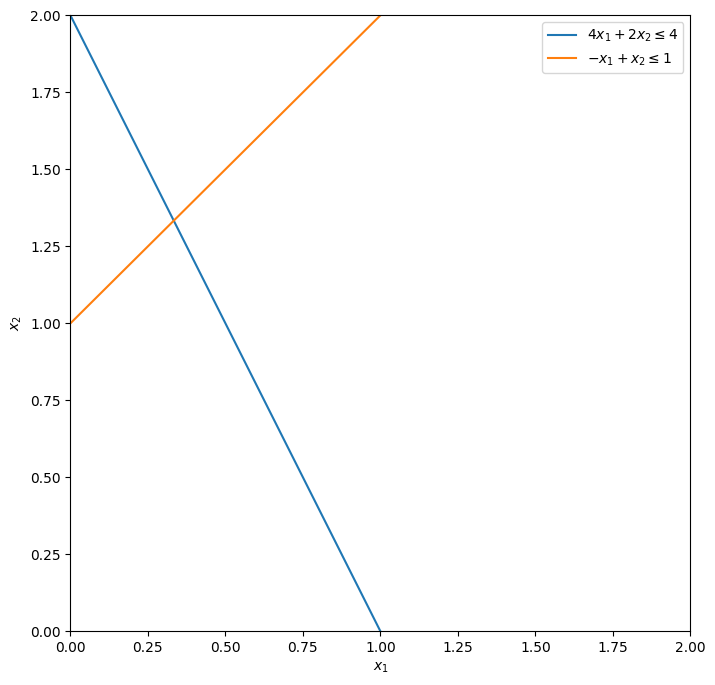

Status: Infeasible
Optimal Solution to the variables x1 and x2 for alpha = 0 is
x1 = 0.5
x2 = 1.5
Objective Function Value: 1.5
Status: Infeasible
Optimal Solution to the variables x1 and x2 for alpha = 1 is
x1 = 0.5
x2 = 1.5
Objective Function Value: 2.0
Status: Infeasible
Optimal Solution to the variables x1 and x2 for alpha = 2 is
x1 = 0.5
x2 = 1.5
Objective Function Value: 2.5


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pulp import *

# تابع برای ترسیم خطوط محدودیت و ناحیه مجاز
def plot_constraints():
    # محدوده مقادیر x1 و x2
    x = np.linspace(0, 10, 400)
    y = np.linspace(0, 10, 400)

    # خطوط محدودیت
    y1 = (4 - 4*x) / 2
    y2 = x + 1
    y3 = (4 - 2*x) / 2

    plt.figure(figsize=(8, 8))

    # ترسیم خطوط محدودیت
    plt.plot(x, y1, label=r'$4x_1 + 2x_2 \leq 4$')
    plt.plot(x, y2, label=r'$-x_1 + x_2 \leq 1$')
    plt.fill_between(x, np.maximum(0, y3), np.minimum(y1, y2), where=(y3<=y1) & (y3<=y2) & (x>=0) & (x<=2), color='gray', alpha=0.5)

    # تنظیمات نمودار
    plt.xlim((0, 2))
    plt.ylim((0, 2))
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')

    # افزودن افسانه
    plt.legend()

    # نمایش نمودار
    plt.show()

# تابع برای حل مسئله بهینه‌سازی و نمایش نتایج
def solve_linear_optimization(alpha):
    # تعریف مسئله
    prob = LpProblem("The_Optimization_Problem", LpMaximize)

    # تعریف متغیرها
    x1 = LpVariable("x1", 0, None) # x1 ≥ 0
    x2 = LpVariable("x2", 0, None) # x2 ≥ 0

    # تابع هدف
    prob += alpha * x1 + x2, "Objective Function"

    # محدودیت‌ها
    prob += 4 * x1 + 2 * x2 <= 4, "Constraint 1"
    prob += -x1 + x2 <= 1, "Constraint 2"
    prob += 2 * x1 + 2 * x2 >= 4, "Constraint 3"

    # حل مسئله
    prob.solve()

    # نمایش جواب
    print(f"Status: {LpStatus[prob.status]}")
    print(f"Optimal Solution to the variables x1 and x2 for alpha = {alpha} is")
    for v in prob.variables():
        print(v.name, "=", v.varValue)
    print(f"Objective Function Value: {value(prob.objective)}")

# ترسیم نمودار محدودیت‌ها و ناحیه مجاز
plot_constraints()

# مقادیر مختلف برای α
alphas = [0, 1, 2]

# حل مسئله برای هر مقدار α و نمایش نتایج
for alpha in alphas:
    solve_linear_optimization(alpha)


Question 5

In [10]:
import numpy as np
from scipy.optimize import linprog

# تعریف ماتریس پرداخت‌ها
payoff_matrix = np.array([
    [1, -5, 2, 4],
    [5, 1, 2, 3],
    [4, 3, 5, 7],
    [-2, 2, 4, 0],
    [3, -1, 0, 4]
])

# تابع برای یافتن نقطه تعادل نش
def find_nash_equilibrium(payoff_matrix):
    num_strategies = payoff_matrix.shape[0]

    # تبدیل مسئله به فرم استاندارد برای حل با linprog
    c = -np.ones(num_strategies)
    A_ub = -payoff_matrix.T
    b_ub = -np.ones(payoff_matrix.shape[1])

    # حل مسئله بهینه‌سازی خطی
    res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=(0, None))

    # بررسی اینکه آیا مسئله به درستی حل شده است
    if res.success:
        # استراتژی بهینه برای بازیکن 1
        strategy_player_1 = res.x
        value_game = 1 / np.sum(res.x)
        strategy_player_1 *= value_game

        # استراتژی بهینه برای بازیکن 2
        strategy_player_2 = value_game * np.ones(payoff_matrix.shape[1]) - np.dot(payoff_matrix, res.x)

        return strategy_player_1, strategy_player_2, value_game
    else:
        # اگر مسئله حل نشده باشد، پیام خطا را چاپ کنید
        print("مسئله بهینه‌سازی حل نشد: ", res.message)
        return None, None, None

# یافتن نقطه تعادل نش
strategy_player_1, strategy_player_2, value_game = find_nash_equilibrium(payoff_matrix)

if strategy_player_1 is not None:
    print("استراتژی بهینه برای بازیکن 1:", strategy_player_1)
    print("استراتژی بهینه برای بازیکن 2:", strategy_player_2)
    print("ارزش بازی:", value_game)


مسئله بهینه‌سازی حل نشد:  The problem is unbounded. (HiGHS Status 10: model_status is Unbounded; primal_status is At upper bound)


Question 6

In [11]:
import numpy as np
from scipy.optimize import linprog

# تعریف ماتریس پرداخت‌ها
payoff_matrix = np.array([
    [2, 0, 4],
    [1, 2, 3],
    [4, 1, 2]
])

# تابع برای یافتن نقطه تعادل نش
def find_nash_equilibrium(payoff_matrix):
    num_strategies = payoff_matrix.shape[0]

    # تبدیل مسئله به فرم استاندارد برای حل با linprog
    c = -np.ones(num_strategies)
    A_ub = -payoff_matrix.T
    b_ub = -np.ones(payoff_matrix.shape[1])

    # حل مسئله بهینه‌سازی خطی
    res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=(0, None))

    # بررسی اینکه آیا مسئله به درستی حل شده است
    if res.success:
        # استراتژی بهینه برای بازیکن 1
        strategy_player_1 = res.x
        value_game = 1 / np.sum(res.x)
        strategy_player_1 *= value_game

        # استراتژی بهینه برای بازیکن 2
        strategy_player_2 = value_game * np.ones(payoff_matrix.shape[1]) - np.dot(payoff_matrix, res.x)

        return strategy_player_1, strategy_player_2, value_game
    else:
        # اگر مسئله حل نشده باشد، پیام خطا را چاپ کنید
        print("مسئله بهینه‌سازی حل نشد: ", res.message)
        return None, None, None

# یافتن نقطه تعادل نش
strategy_player_1, strategy_player_2, value_game = find_nash_equilibrium(payoff_matrix)

if strategy_player_1 is not None:
    print("استراتژی بهینه برای بازیکن 1:", strategy_player_1)
    print("استراتژی بهینه برای بازیکن 2:", strategy_player_2)
    print("ارزش بازی:", value_game)


مسئله بهینه‌سازی حل نشد:  The problem is unbounded. (HiGHS Status 10: model_status is Unbounded; primal_status is At upper bound)


Question 7